# Question Number1
Imagine you have a dataset where you have different Instagram features like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('instagram_reach.csv')

In [3]:
data.head(10)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
5,5,6,be.masterly,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,3 hours,18
6,6,7,lenovoworkstations,Check it out – we’re walking across the 🌎’s fi...,259,.#Tech #virtualreality #IoT #Machinelearning,3 hours,35
7,7,8,kirellb,Here's a network I made that depicts the scien...,1433,#datascientist #creativetechnology#design #art...,4 hours,86
8,8,9,ethicsandai,Having a great week at @ldntechweek exploring ...,13,#LTW #London #TechXLR8 #Technology#AI #Artific...,4 hours,22
9,9,10,diworksolucionesdeti,The Internet of Things : A Very Short Story [#...,450,[#Infographic] #Wearable #Sensors #MachineLear...,7 hours,18


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [5]:
data.dtypes

Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100.0,8.94,6.639064,0.0,4.00,8.0,12.25,26.0
S.No,100.0,16.24,7.384286,1.0,10.75,16.5,22.25,30.0
Followers,100.0,961.96,1014.625670,11.0,252.75,612.0,1197.00,4496.0
Likes,100.0,46.48,55.086980,8.0,19.00,29.0,46.00,349.0


In [7]:
data.duplicated().sum()

0

In [8]:
data.nunique()

Unnamed: 0           27
S.No                 30
USERNAME             95
Caption              94
Followers            94
Hashtags             98
Time since posted    11
Likes                55
dtype: int64

In [9]:
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [10]:
data.isnull().sum().sum()

6

In [11]:
# Data Preprocessing

data['Time since posted'] = data['Time since posted'].str.extract('(\d+)').astype(float)

In [12]:
selected_features = ['Followers', 'Time since posted']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [14]:
# Data Splitting
X_train, X_test, y_train_likes, y_test_likes, y_train_time, y_test_time = train_test_split(
    data[selected_features], data['Likes'], data['Time since posted'], test_size=0.2, random_state=42
)

In [15]:
# Model Building
rf_likes_model = RandomForestRegressor()
rf_time_model = RandomForestRegressor()

gb_likes_model = GradientBoostingRegressor()
gb_time_model = GradientBoostingRegressor()

svr_likes_model = SVR()
svr_time_model = SVR()

knn_likes_model = KNeighborsRegressor()
knn_time_model = KNeighborsRegressor()

lr_likes_model = LinearRegression()
lr_time_model = LinearRegression()

In [16]:
# Fit the models
rf_likes_model.fit(X_train, y_train_likes)
rf_time_model.fit(X_train, y_train_time)

gb_likes_model.fit(X_train, y_train_likes)
gb_time_model.fit(X_train, y_train_time)

svr_likes_model.fit(X_train, y_train_likes)
svr_time_model.fit(X_train, y_train_time)

knn_likes_model.fit(X_train, y_train_likes)
knn_time_model.fit(X_train, y_train_time)

lr_likes_model.fit(X_train, y_train_likes)
lr_time_model.fit(X_train, y_train_time)

LinearRegression()

In [17]:
# Model Evaluation
rf_likes_predictions = rf_likes_model.predict(X_test)
rf_time_predictions = rf_time_model.predict(X_test)

gb_likes_predictions = gb_likes_model.predict(X_test)
gb_time_predictions = gb_time_model.predict(X_test)

svr_likes_predictions = svr_likes_model.predict(X_test)
svr_time_predictions = svr_time_model.predict(X_test)

knn_likes_predictions = knn_likes_model.predict(X_test)
knn_time_predictions = knn_time_model.predict(X_test)

lr_likes_predictions = lr_likes_model.predict(X_test)
lr_time_predictions = lr_time_model.predict(X_test)

In [18]:
# Evaluate the models using Mean Absolute Error
mae_rf_likes = mean_absolute_error(y_test_likes, rf_likes_predictions)
mae_rf_time = mean_absolute_error(y_test_time, rf_time_predictions)

mae_gb_likes = mean_absolute_error(y_test_likes, gb_likes_predictions)
mae_gb_time = mean_absolute_error(y_test_time, gb_time_predictions)

mae_svr_likes = mean_absolute_error(y_test_likes, svr_likes_predictions)
mae_svr_time = mean_absolute_error(y_test_time, svr_time_predictions)

mae_knn_likes = mean_absolute_error(y_test_likes, knn_likes_predictions)
mae_knn_time = mean_absolute_error(y_test_time, knn_time_predictions)

mae_lr_likes = mean_absolute_error(y_test_likes, lr_likes_predictions)
mae_lr_time = mean_absolute_error(y_test_time, lr_time_predictions)

In [19]:
# Print MAE for each model
print(f'Random Forest - MAE Likes: {mae_rf_likes}, MAE Time: {mae_rf_time}')
print(f'Gradient Boosting - MAE Likes: {mae_gb_likes}, MAE Time: {mae_gb_time}')
print(f'SVR - MAE Likes: {mae_svr_likes}, MAE Time: {mae_svr_time}')
print(f'KNN - MAE Likes: {mae_knn_likes}, MAE Time: {mae_knn_time}')
print(f'Linear Regression - MAE Likes: {mae_lr_likes}, MAE Time: {mae_lr_time}')

Random Forest - MAE Likes: 12.783499999999998, MAE Time: 0.29700000000000004
Gradient Boosting - MAE Likes: 11.352252412360274, MAE Time: 0.1963509164775234
SVR - MAE Likes: 23.19409315910763, MAE Time: 1.9829009853144612
KNN - MAE Likes: 21.410000000000004, MAE Time: 1.7900000000000003
Linear Regression - MAE Likes: 18.497853347786, MAE Time: 8.659739592076221e-16


# Question No. 2
 Question: 2
Train an SVM regressor on : Bengaluru housing dataset

    Must include in details:

  - EDA

  - Feature engineering 

In [20]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [21]:
df.head(10)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


df.info()

In [22]:
df.shape

(13320, 9)

In [23]:
df.duplicated().sum()

529

In [24]:
df = df.drop_duplicates()

In [25]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

# Handlng missing values

In [26]:
data=df.copy()

In [27]:
data = data.drop(columns=['society'])
data['size'].fillna(value=data['size'].mode()[0], inplace=True)
data['bath'].fillna(value=data['bath'].mode()[0], inplace=True)
data['balcony'].fillna(value=data['balcony'].mode()[0], inplace=True)

In [28]:
data.isnull().sum()

area_type       0
availability    0
location        1
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [29]:
data=data.dropna()

In [30]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [31]:
# Discriptive statistics Analyzation

In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,12790.0,2.704535,1.354986,1.0,2.0,2.0,3.0,40.0
balcony,12790.0,1.602033,0.807752,0.0,1.0,2.0,2.0,3.0
price,12790.0,114.319860,151.486026,8.0,50.0,73.0,121.0,3600.0


For the "bath" feature:

- The dataset contains 12,790 entries for the number of bathrooms.
- The average (mean) number of bathrooms is approximately 2.70.
- The standard deviation is 1.35, indicating a moderate amount of variability.
- The minimum number of bathrooms is 1, and the maximum is 40.
- 25% of the data falls below 2 bathrooms, 50% falls below 2 bathrooms (median), and 75% falls below 3 bathrooms.

For the "balcony" feature:

- The dataset contains 12,790 entries for the number of balconies.
- The average (mean) number of balconies is approximately 1.60.
- The standard deviation is 0.81, indicating some variability.
- The minimum number of balconies is 0, and the maximum is 3.
- 25% of the data falls below 1 balcony, 50% falls below 2 balconies (median), 
and 75% falls below 2 balconies.

For the "price" feature:

- The dataset contains 12,790 entries for the price of the property.
- The average (mean) price is approximately 114.32.
- The standard deviation is 151.49, indicating a significant amount of variability.
- The minimum price is 8, and the maximum is 3600.
- 25% of the data falls below 50, 50% falls below 73 (median), and 75% falls below 121.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12790 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12790 non-null  object 
 1   availability  12790 non-null  object 
 2   location      12790 non-null  object 
 3   size          12790 non-null  object 
 4   total_sqft    12790 non-null  object 
 5   bath          12790 non-null  float64
 6   balcony       12790 non-null  float64
 7   price         12790 non-null  float64
dtypes: float64(3), object(5)
memory usage: 899.3+ KB


In [34]:
# Converstion of necessary features from object to numeric

In [35]:
data['total_sqft'] = pd.to_numeric(data['total_sqft'], errors='coerce')

# Verify the changes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12790 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12790 non-null  object 
 1   availability  12790 non-null  object 
 2   location      12790 non-null  object 
 3   size          12790 non-null  object 
 4   total_sqft    12544 non-null  float64
 5   bath          12790 non-null  float64
 6   balcony       12790 non-null  float64
 7   price         12790 non-null  float64
dtypes: float64(4), object(4)
memory usage: 899.3+ KB
None


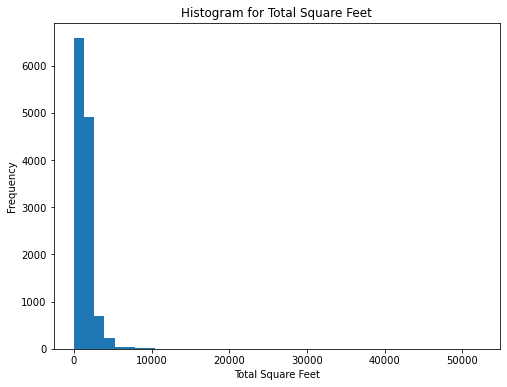

In [36]:
# Plotting histogram for 'total_sqft'
plt.figure(figsize=(8, 6))
plt.hist(data['total_sqft'], bins=40)
plt.title('Histogram for Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Frequency')
plt.show()

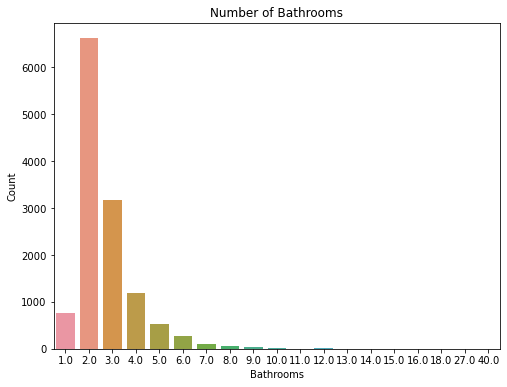

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='bath', data=data)
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

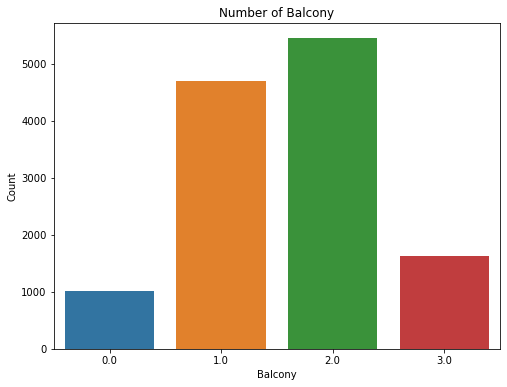

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='balcony', data=data)
plt.title('Number of Balcony')
plt.xlabel('Balcony')
plt.ylabel('Count')
plt.show()

In [39]:
data['area_type'].value_counts()

Super built-up  Area    8316
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: area_type, dtype: int64

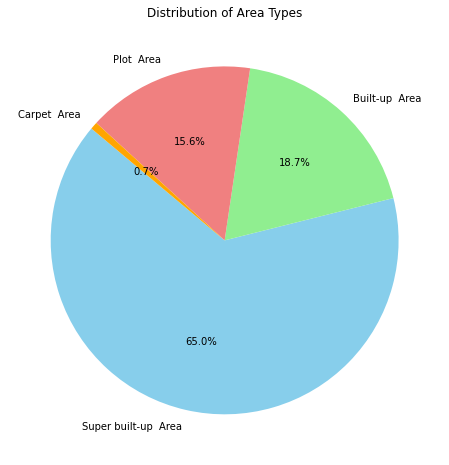

In [40]:
area_type_counts = data['area_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(area_type_counts, labels=area_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Distribution of Area Types')
plt.show()

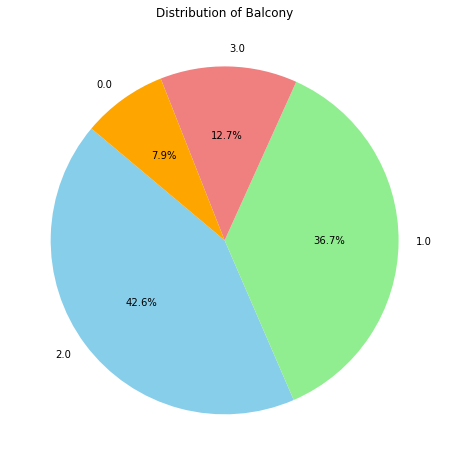

In [41]:
area_type_counts = data['balcony'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(area_type_counts, labels=area_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Distribution of Balcony')
plt.show()

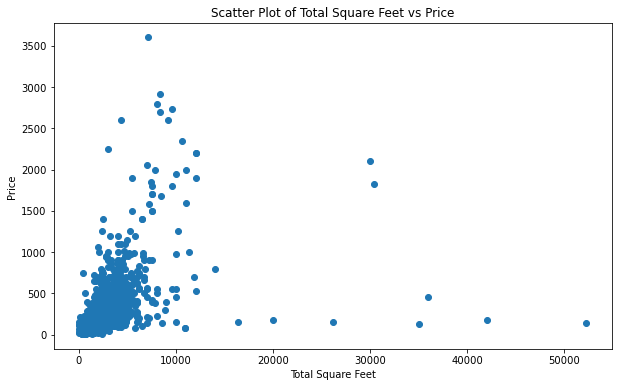

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(data['total_sqft'], data['price'])
plt.title('Scatter Plot of Total Square Feet vs Price')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.show()

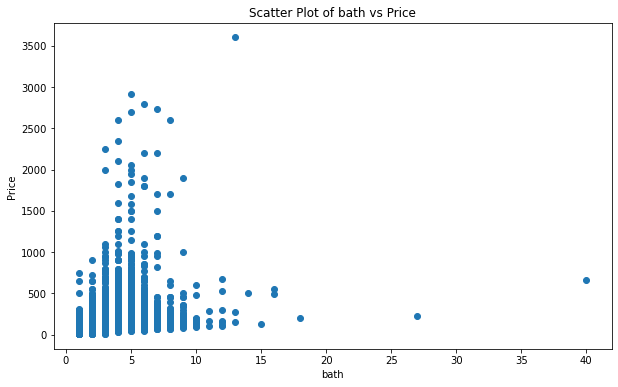

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(data['bath'], data['price'])
plt.title('Scatter Plot of bath vs Price')
plt.xlabel('bath')
plt.ylabel('Price')
plt.show()

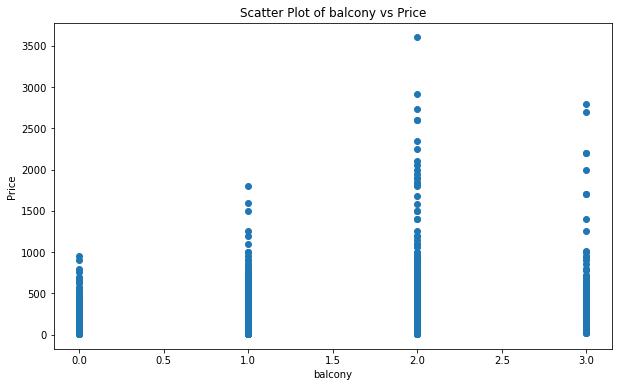

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(data['balcony'], data['price'])
plt.title('Scatter Plot of balcony vs Price')
plt.xlabel('balcony')
plt.ylabel('Price')
plt.show()

In [45]:
# Feature Engineering

In [46]:
data['BHK']=data['size'].apply(lambda x: int(x.split(' ')[0]))

In [47]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


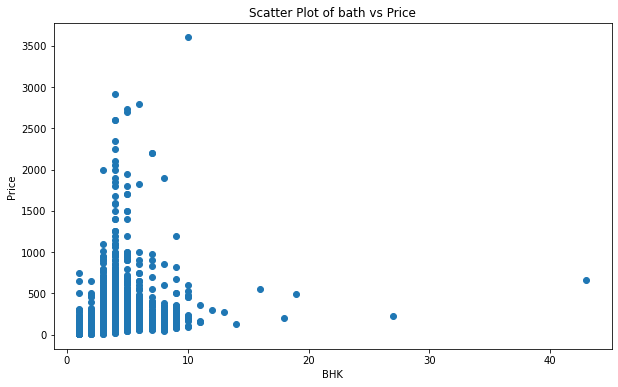

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(data['BHK'], data['price'])
plt.title('Scatter Plot of bath vs Price')
plt.xlabel('BHK')
plt.ylabel('Price')
plt.show()

In [49]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [50]:
# Checking the outliers

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12790 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12790 non-null  object 
 1   availability  12790 non-null  object 
 2   location      12790 non-null  object 
 3   size          12790 non-null  object 
 4   total_sqft    12544 non-null  float64
 5   bath          12790 non-null  float64
 6   balcony       12790 non-null  float64
 7   price         12790 non-null  float64
 8   BHK           12790 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 999.2+ KB


In [52]:
# Outlier Check

In [53]:
numeric_columns=data.select_dtypes(include=['float64', 'int64']).columns

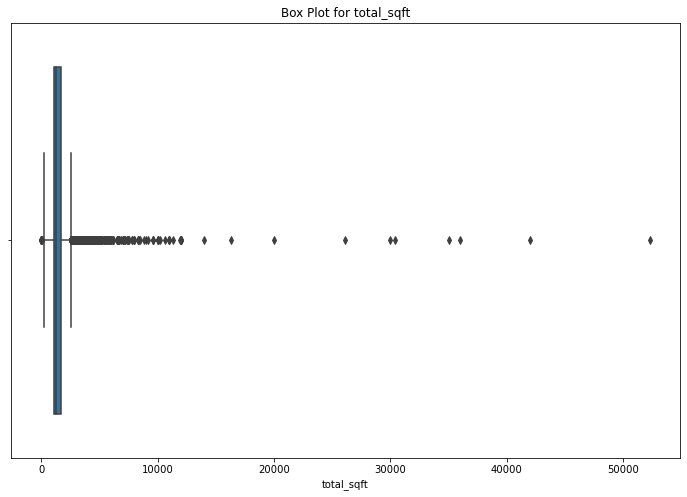

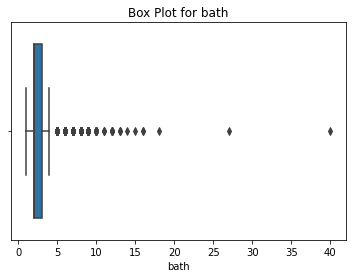

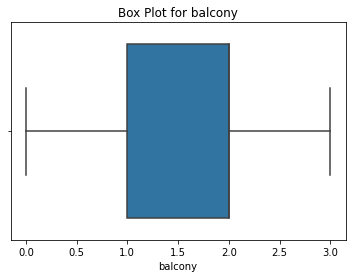

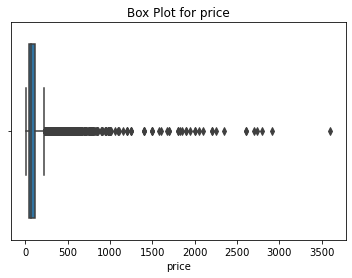

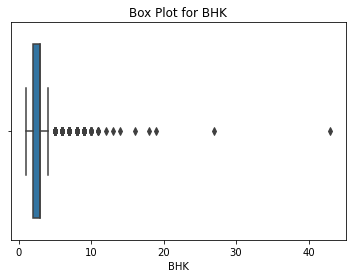

In [54]:
# Checking the Outliers using the box plots
plt.figure(figsize=(12, 8))

# Create box plots for each numeric column
for col in numeric_columns:
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

In [55]:
# Outlier Treatment

In [56]:
df1=data.copy()

In [57]:
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [58]:
for col in numeric_columns:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers from the column
    df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]

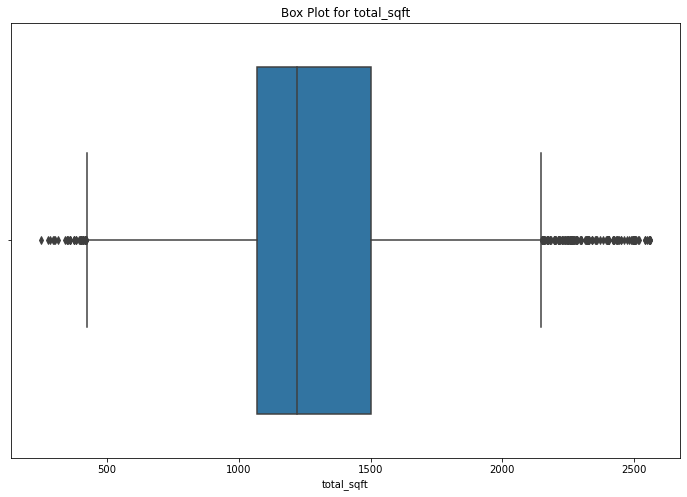

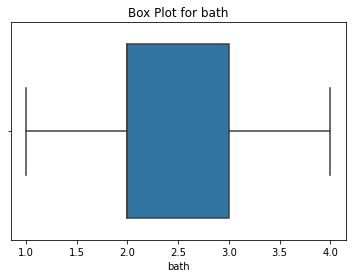

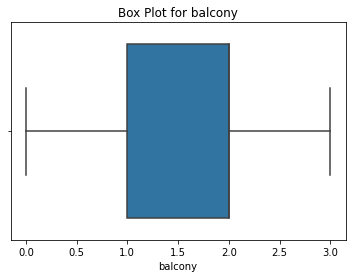

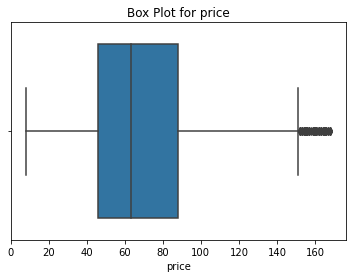

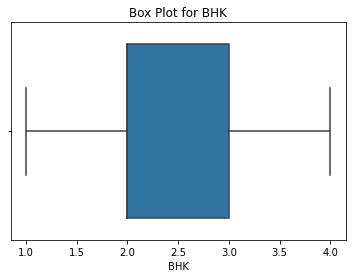

In [59]:
# Checking the Outliers using the box plots
plt.figure(figsize=(12, 8))

# Create box plots for each numeric column
for col in numeric_columns:
    sns.boxplot(x=df1[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

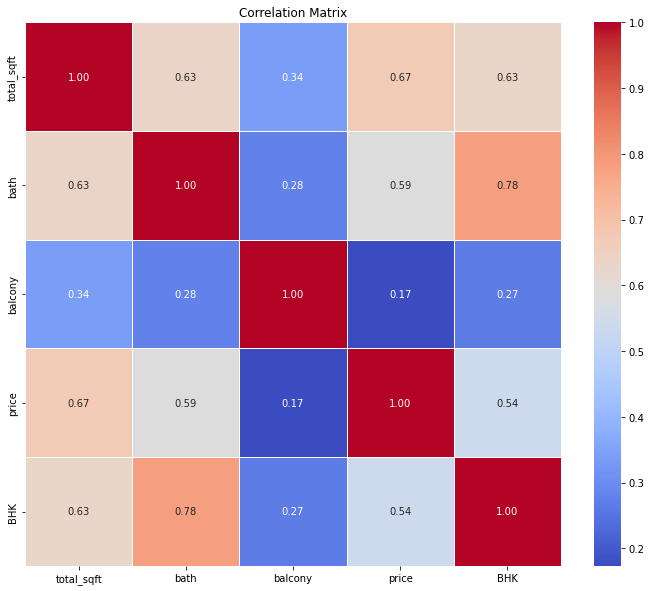

In [60]:
# Bivarate analysis

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [61]:
# Split the data into features (X) and target variable (y)
X = df1.drop(['price'], axis=1)
y = df1['price']

In [62]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [64]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

In [65]:
# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [66]:
svm_regressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

In [67]:
# Initialize and train an SVM Regressor
svm_regressor.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['total_sqft', 'bath', 'balcony', 'BHK'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['area_type', 'availability', 'location', 'size'], dtype='object'))])),
                ('regressor', SVR())])

In [68]:
predictions = svm_regressor.predict(X_test)

In [69]:
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error {mae}')

Mean Absolute Error 16.966327029512204


In [70]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# R-squared (R2)
r2 = r2_score(y_test, predictions)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

print(f'R-squared (R2): {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

R-squared (R2): 0.45884094001445763
Mean Absolute Error (MAE): 16.966327029512204
Mean Squared Error (MSE): 556.3563059117419


# Qestion 3.

Train and fine tune a decision tree using the wine dataset by following the following steps:-

  1. Use load_wine() to generate wine dataset
  2. Split the dataset into train and test  dataset
  3. Use random search CV to hyperparameter tune the Decision Tree
  4. Try to achieve an accuracy of at least 85%


Grow a random forest using the following steps:-

  1. Continuing the previous question, create 10 subsets of the training dataset. You can use the ShuffleSplit                class for it.
  2. Train 1 decision tree on each subset, using the best hyperparameter values found in the previous question.
  3. Evaluate all the trees on the test dataset. Are they performing better than the tree created in the previous question?

In [71]:
from sklearn.datasets import load_wine

In [72]:
# Step 1: Load Wine dataset
wine_data = load_wine()

In [73]:
X, y = wine_data.data, wine_data.target

In [74]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [75]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# Hyperparameter tuning using RandomizedSearchCV for Decision Tree
from scipy.stats import randint
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [78]:
from sklearn.model_selection import RandomizedSearchCV,ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [79]:
dt_classifier = DecisionTreeClassifier(random_state=42)


In [80]:
random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

In [81]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022081CD8190>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022081CD8F10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022081D3CE80>,
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [82]:
# Display best hyperparameters and accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'best'}
Best Accuracy: 0.9155172413793103


In [83]:
# Check if accuracy is at least 85%
if random_search.best_score_ >= 0.85:
    print("Accuracy threshold achieved! Proceeding to Random Forest.")
else:
    print("Accuracy is below 85%. Tune hyperparameters further or consider other approaches.")

Accuracy threshold achieved! Proceeding to Random Forest.


In [84]:
# Train a Decision Tree using the best hyperparameters
best_dt_classifier = random_search.best_estimator_
y_pred = best_dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)
print("Decision Tree Test Accuracy:", accuracy_dt)

Decision Tree Test Accuracy: 0.9444444444444444


In [85]:
#  Grow a Random Forest using 10 subsets of the training dataset
rs = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
rf_classifiers = []

In [86]:
for train_index, _ in rs.split(X_train):
    subset_X_train, subset_y_train = X_train[train_index], y_train[train_index]
    rf_classifier = DecisionTreeClassifier(**random_search.best_params_)
    rf_classifier.fit(subset_X_train, subset_y_train)
    rf_classifiers.append(rf_classifier)

In [87]:
# Evaluate all trees on the test dataset
rf_predictions = [clf.predict(X_test) for clf in rf_classifiers]

In [88]:
# Calculate accuracy for each tree
rf_accuracies = [accuracy_score(y_test, pred) for pred in rf_predictions]

In [89]:
if any(acc > accuracy_dt for acc in rf_accuracies):
    print("At least one tree in the Random Forest performs better than the single Decision Tree.")
else:
    print("Random Forest does not show significant improvement over the single Decision Tree.")

At least one tree in the Random Forest performs better than the single Decision Tree.
